In [262]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

In [263]:
df=pd.read_csv('mymoviedb.csv',lineterminator='\n')

# Data Preprocessing 

In [264]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [266]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])

In [267]:
df['Release_Date']=df['Release_Date'].dt.year

In [268]:
df['Release_Date'].dtypes

dtype('int32')

In [269]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [270]:
col=['Overview','Original_Language','Poster_Url']
df.drop(col,inplace=True,axis=1)

In [271]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [272]:
df.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000,9827.000000
mean,2006.203623,40.326088,1392.805536,6.439534
std,15.685554,108.873998,2611.206907,1.129759
min,1902.000000,13.354000,0.000000,0.000000
25%,2000.000000,16.128500,146.000000,5.900000
50%,2011.000000,21.199000,444.000000,6.500000
75%,2017.000000,35.191500,1376.000000,7.100000
max,2024.000000,5083.954000,31077.000000,10.000000


In [273]:
def category_val(df,col,labels):
    edges=[df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]
    df[col]=pd.cut(df[col],edges,labels=labels,duplicates='drop')
    return df

In [274]:
labels=['not popular','below average','average','popular']
category_val(df,'Vote_Average',labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,popular,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,not popular,Horror
9824,2016,The Offering,13.355,94,not popular,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History"


In [275]:
df.isna().sum()

Release_Date      0
Title             0
Popularity        0
Vote_Count        0
Vote_Average    100
Genre             0
dtype: int64

In [276]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [277]:
df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25793 non-null  object  
dtypes: category(1), float64(1), int32(1), int64(1), object(2)
memory usage: 932.3+ KB


In [279]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25552 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  object  
dtypes: category(1), float64(1), int32(1), int64(1), object(2)
memory usage: 1.1+ MB


In [281]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# Data Visualisation

In [282]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

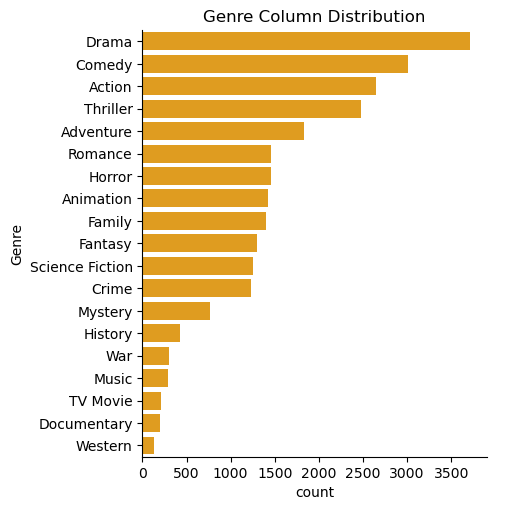

In [283]:
sns.catplot(data=df,y='Genre',
            kind='count',color='orange',
            order=df['Genre'].value_counts().index)
plt.title('Genre Column Distribution')
plt.show()

In [284]:
df['Vote_Average'].describe()

count       25552
unique          4
top       average
freq         6613
Name: Vote_Average, dtype: object

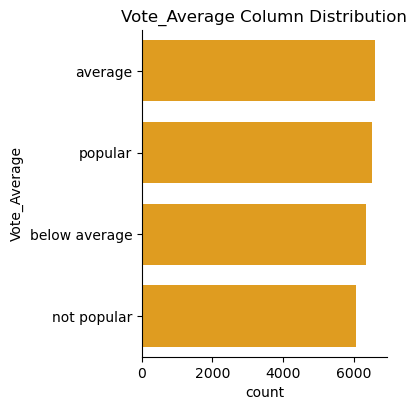

In [285]:
sns.catplot(data = df, y='Vote_Average',
            color='orange',kind='count',
            order=df['Vote_Average'].value_counts().index,
           height=4,width=0.75)
plt.title('Vote_Average Column Distribution')
plt.show()

In [286]:
maxp=df[df['Popularity']==df['Popularity'].max()]
maxp[['Title','Genre']]

,Title,Genre
0,Spider-Man: No Way Home,Action
1,Spider-Man: No Way Home,Adventure
2,Spider-Man: No Way Home,Science Fiction


In [287]:
minp=df[df['Popularity']==df['Popularity'].min()]
minp[['Title','Genre']]

,Title,Genre
25787,The United States vs. Billie Holiday,Music
25788,The United States vs. Billie Holiday,Drama
25789,The United States vs. Billie Holiday,History
25790,Threads,War
25791,Threads,Drama
25792,Threads,Science Fiction


In [295]:
df['Release_Date'].describe()['max']

2022.0

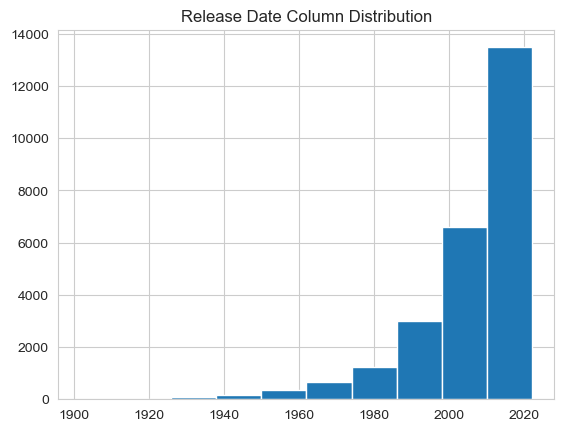

In [296]:
sns.set_style('whitegrid')
df['Release_Date'].hist()
plt.title('Release Date Column Distribution')
plt.show()

# Summary